In [324]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torchsummary 
from torchsummary import summary

### Pytorch Tensor

* Operations on tensors

* Auto gradients of tensor objects

In [325]:
# 1. Define a tensor object and also specify that it requires a gradient to be calculated:
x = torch.tensor([[2., -1.], [1., 1.]], requires_grad=True)
print(x)

tensor([[ 2., -1.],
        [ 1.,  1.]], requires_grad=True)


In [326]:
# 2. Next, define the way to calculate the output, which in this specific case is
# the sum of the squares of all inputs:
out = x.pow(2).sum()

In [327]:
# 3. The gradient of a value can be calculated by calling the backward()
# method to the value. In our case, we calculate the gradient – change in
# out (output) for a small change in x (input) – as follows:
out.backward()

In [328]:
# 4. We are now in a position to obtain the gradient of out with respect to x, as follows:
x.grad

tensor([[ 4., -2.],
        [ 2.,  2.]])

* Advantages of PyTorch's tensors over NumPy's ndarrays

In [329]:
# A Torch tensor object is optimized to work with a GPU compared to NumPy

# 1. Generate two different torch objects:
x = torch.rand(1, 6400)
y = torch.rand(6400, 5000)

# 2. Define the device to which we will store the tensor objects we created in
# step 1:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 3. Register the tensor objects that were created in step 1 with the device.
# Registering tensor objects means storing information in a device:
x, y = x.to(device=device), y.to(device=device)

# 4. Perform matrix multiplication of the Torch objects and also, time it so that
# we can compare the speed in a scenario where matrix multiplication is
# performed on NumPy arrays:
z = x@y

In [330]:
# 5. Perform matrix multiplication of the same tensors on cpu:
x, y = x.cpu(), y.cpu()


### Building a neural network using PyTorch

In [331]:
# 1. Define the input x and output y values:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [332]:
# 2. Convert the input lists into tensor objects:
x = torch.tensor(x).float()
y = torch.tensor(y).float()
# Register to GPU if available:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x, y = x.to(device=device), y.to(device=device)

In [333]:
# 3. Define the neural network architecture:
from turtle import forward


class MyNeuralNet(nn.Module):
    def __init__(self):
        super(MyNeuralNet, self).__init__()
        
        # define the layers in NN:
        self.input_to_hidden = nn.Linear(2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hiddent_to_output = nn.Linear(8, 1)

    def forward(self, x):
        # define the forward pass:
        x = self.input_to_hidden(x)
        x = self.hidden_layer_activation(x)
        x = self.hiddent_to_output(x)
        return x

In [334]:
# 4. You can access the initial weights of each of the components by performing
# the following steps:
    # Create an instance of the MyNeuralNet class object that we defined
    # earlier and register it to device:
mynet = MyNeuralNet().to(device)

    # The weights and bias of each layer can be accessed by specifying the
    # following:
mynet.input_to_hidden.weight

Parameter containing:
tensor([[-0.5598, -0.2387],
        [ 0.0056,  0.4947],
        [ 0.1813, -0.4351],
        [-0.5140, -0.5449],
        [ 0.6990,  0.5592],
        [ 0.4583, -0.2984],
        [ 0.5619,  0.5874],
        [-0.2946, -0.6538]], requires_grad=True)

In [335]:
# 5. Define the loss function that we optimize for. Given that we are predicting
# for a continuous output, we'll optimize for mean squared error:
loss_func = nn.MSELoss()
# The loss value of a neural network can be calculated by passing the
# input values through the neuralnet object and then
# calculating MSELoss for the given inputs:
_y = mynet(x)
loss_value = loss_func(_y, y)
loss_value

# *Note:  use _<variable> to associate prediction 
# corresponding to the ground truth <variable>

tensor(51.7640, grad_fn=<MseLossBackward0>)

In [336]:
# 6. Import the SGD method from the torch.optim module and then pass the
# neural network object (mynet) and learning rate (lr) as parameters to the
# SGD method:
from torch.optim import SGD
optimizer = SGD(mynet.parameters(), lr=0.001)

Text(0, 0.5, 'loss value')

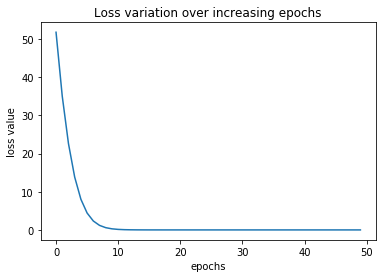

In [337]:
# 7. Perform all the steps to be done in an epoch together:
# * Calculate the loss value corresponding to the given input and output.
# * Calculate the gradient corresponding to each parameter.
# * Update the weights based on the learning rate and gradient of each
#   parameter.
# * Once the weights are updated, ensure that the gradients that have
#   been calculated in the previous step are flushed before calculating the
#   gradients in the next epoch:
loss_history = []
for _ in range(50):     # 50 epoch
    # ensure that the gradients that have
    # been calculated in the previous step are flushed before calculating the
    # gradients in the next epoch:
    optimizer.zero_grad()

    # Calculate the loss value corresponding to the given input and output.
    loss_value = loss_func(mynet(x), y)

    # Calculate the gradient corresponding to each parameter.
    loss_value.backward()

    # Update the weights based on the learning rate and gradient of each
    optimizer.step()

    # store the loss value in a list:
    loss_history.append(loss_value)

plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

* Dataset, DataLoader, and batch size

In [338]:
# 1. Import the methods that help in loadding data and dealing with datasets:
from torch.utils.data import Dataset, DataLoader

In [339]:
# 2. Import the data, convert the data into floating-point numbers, and register them to device:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]
# Convert data to floating-point numbers:
x = torch.tensor(x).float()
y = torch.tensor(y).float()
# Register to GPU if available:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x, y = x.to(device=device), y.to(device=device)

In [340]:
# 3. Instantiate a class of the dataset - MyDataset:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x).float()
        self.y = torch.tensor(y).float()

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]  
        # idx: index of row     

In [341]:
# 4. Create an instance of the defined class:
ds = MyDataset(x, y)

c:\Users\longl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
c:\Users\longl\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


In [342]:
# 5. Pass the data instance defined previously through DataLoader 
# to fetch the batch_size number of data points from the original input and output
# tensor objects:
dl = DataLoader(ds, batch_size=2)

In [343]:
# 6. Define model object, loss function and optimizer:
mynet = MyNeuralNet().to(device)
loss_func = nn.MSELoss()
optimizer = SGD(mynet.parameters(), lr=0.001)

Text(0, 0.5, 'loss value')

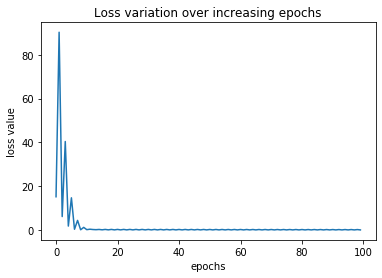

In [344]:
# 7. Finally, loop through the batches of data point
# to minimize the loss value:
loss_history = []
for _ in range(50):
    for data in dl:
        x, y = data
        optimizer.zero_grad()
        loss_value = loss_func(mynet(x), y)
        loss_value.backward()
        optimizer.step()
        loss_history.append(loss_value)
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

* Predicting on new data points

In [345]:
# 1. Create the data points that we want to test our model on:
val_x = [[10, 11]]

In [346]:
# 2. Convert the new data points into a tensor float object 
# and register it to device:
val_x = torch.tensor(val_x).float()
val_x = val_x.to(device=device)

In [347]:
# 3. Pass the tensor object through the trained neural network:
val_y = mynet(val_x)
val_y

tensor([[20.4826]], grad_fn=<AddmmBackward0>)

In [348]:
true_y = [[20]]
true_y = torch.tensor(true_y).float().to(device=device)

* Implementing a custom loss function

In [349]:
loss_func = nn.MSELoss()
loss_value = loss_func(mynet(val_x), true_y)
print(loss_value)

tensor(0.2329, grad_fn=<MseLossBackward0>)


* Fetching the values of intermediate layers

In [350]:
# In certain scenarios, it is helpful to fetch the intermediate layer values of the neural
# network (more on this when we discuss the style transfer and transfer learning use
# cases in later chapters).
# PyTorch provides the functionality to fetch the intermediate values of the neural
# network in two ways:

In [351]:
# * One way is by directly calling layers as if they are functions. 
# This can be done as follows:

input_to_hidden = mynet.input_to_hidden(val_x)
hidden_activation = mynet.hidden_layer_activation(input_to_hidden)
print(hidden_activation)

# Note that we had to call the input_to_hidden_layer activation prior
# to calling hidden_layer_activation as the output of
# input_to_hidden_layer is the input to
# the hidden_layer_activation layer.

tensor([[ 0.0000,  3.0725, 15.3785,  0.0000,  8.4502, 11.1621,  0.0000,  4.3630]],
       grad_fn=<ReluBackward0>)


In [352]:
# The other way is by specifying the layers that we want to look at in
# the forward method.
class neuralnet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden = nn.Linear(2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output = nn.Linear(8, 1)

    def forward(self, x):
        hidden1 = self.input_to_hidden(x)
        hidden2 = self.hidden_layer_activation(hidden1)
        output = self.hidden_to_output(hidden2)
        return output, hidden2

In [353]:
mynet = neuralnet().to(device)
mynet(x)[1]

tensor([[3.3399, 2.7326, 0.0000, 0.0000, 1.6294, 0.2645, 3.3170, 1.5315],
        [4.4118, 3.9064, 0.0000, 0.0000, 2.1175, 0.2290, 4.2507, 2.0212]],
       grad_fn=<ReluBackward0>)

In [354]:
mynet(x)[0]

tensor([[0.9314],
        [1.1470]], grad_fn=<AddmmBackward0>)

### Using a sequential method to build a neural network

In [355]:
# 1. Define the toy dataset:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [356]:
# 2. Import the relevant packages and define the 
# device we will work on:
import torch
from torch import nn
from torch.optim import SGD
from torch.utils.data import Dataset, DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [357]:
# 3. Define dataset class:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x).float().to(device=device)
        self.y = torch.tensor(y).float().to(device=device)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [358]:
# 4. Define the dataset and dataloader object:
ds = MyDataset(x, y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

In [359]:
# 5. Define the neural network architecture using Sequntial method:
myModel = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)

In [360]:
# 6. Print a summary of the neural network architecture:
print(myModel)


Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


In [361]:
summary(myModel, torch.zeros(1, 2).to(device=device))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [362]:
# Note that the output shape of the first layer is (-1, 8), where -1 represents
# that there can be as many data points as the batch size, and 8 represents that
# for each data point, we have an eight-dimensional output resulting in an
# output of the shape batch size x 8. The interpretation for the next two layers is similar

Text(0, 0.5, 'loss value')

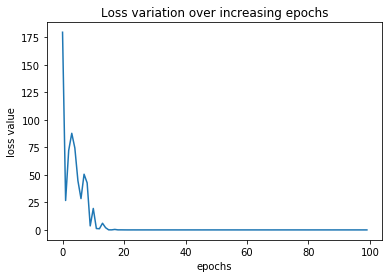

In [363]:
# 7. Next, we define the loss function (loss_func) and optimizer (opt) and
# train the model, just like we did in the previous section. Note that, in this
# case, we need not define a model object; a network is not defined within a
# class in this scenario:
loss_func = nn.MSELoss()
opt = SGD(myModel.parameters(), lr=0.001)
loss_history = []
for _ in range(50):
    for data in dl:
        x, y = data
        opt.zero_grad()
        loss_value = loss_func(myModel(x), y)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value)
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

In [364]:
# 8. Now that we have trained the model, we can 
# predict values on a validation dataset that we define now:
# * Define the validation dataset:
val = [[8, 9], [10, 11], [1.5, 2.5]]
myModel(torch.tensor(val).float().to(device=device))

tensor([[16.9374],
        [20.8900],
        [ 4.0912]], grad_fn=<AddmmBackward0>)

### Saving and loading a PyTorch model

* state dict

In [365]:
# The model.state_dict() command is at the root of understanding how saving and
# loading PyTorch models works. The dictionary in model.state_dict()
# corresponds to the parameter names (keys) and the values (weight and bias values)
# corresponding to the model. state refers to the current snapshot of the model (where
# the snapshot is the set of values at each tensor).
# It returns a dictionary (OrderedDict) of keys and values:
myModel.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3621,  0.4834],
                      [ 0.3966, -0.5762],
                      [ 0.0799,  0.0466],
                      [ 0.8543,  0.7030],
                      [-0.6156, -0.0111],
                      [-0.1940,  0.7829],
                      [-0.1523, -0.1666],
                      [-0.1590, -0.4451]])),
             ('0.bias',
              tensor([-0.4035,  0.5675,  0.3466,  0.4033, -0.0235, -0.6368, -0.0297,  0.1122])),
             ('2.weight',
              tensor([[ 0.0197, -0.1986, -0.0272,  1.1060, -0.0525,  0.4330,  0.3524,  0.0343]])),
             ('2.bias', tensor([-0.1510]))])

* Saving

In [366]:
torch.save(myModel.to('cpu').state_dict(), 'myModel.pt')

* Loading

In [367]:
# Loading a model would require us to initialize the model with random weights first
# and then load the weights from state_dict:
# 1. Create an empty model:
model_loaded = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)

In [368]:
# 2. Load the moel from disk and unserialize it to 
# create an orderedDict value:
state_dict = torch.load('myModel.pt')

In [369]:
# 3. Load state_dict onto model, register to device and make a prediction:
model_loaded.load_state_dict(state_dict)
model_loaded.to(device)
model_loaded(torch.tensor(val).float().to(device=device))

tensor([[16.9374],
        [20.8900],
        [ 4.0912]], grad_fn=<AddmmBackward0>)

### Summary

In this chapter, we learned about the building blocks of PyTorch – tensor objects and
performing various operations on top of them. We proceeded further by building a
neural network on a toy dataset where we started by building a class that initializes
the feed-forward architecture, fetching data points from the dataset by specifying the
batch size, and defining the loss function and the optimizer, looping through multiple
epochs. Finally, we also learned about defining custom loss functions to optimize a
metric of choice and leveraging the sequential method to simplify the process of
defining the network architecture.
All the preceding steps form the foundation of building a neural network, which will
be leveraged multiple times in the various use cases that we will build in subsequent
chapters.
With this knowledge of the various components of building a neural network using
PyTorch, we will proceed to the next chapter, where we will learn about the various
practical aspects of dealing with the hyperparameters of a neural network on image
datasets.